In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [2]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
  
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [6]:
X.shape, X.dtype, Y.shape, Y.dtype


(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [7]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [8]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

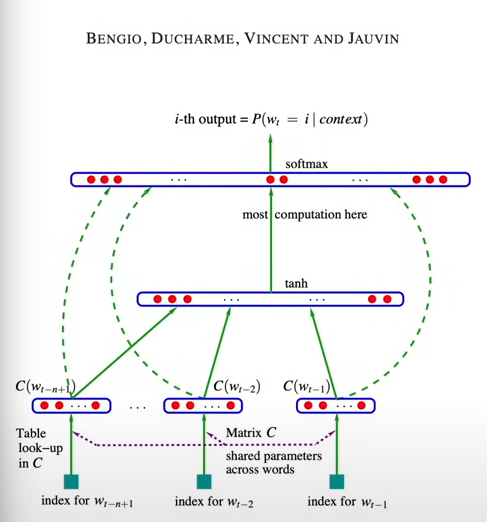

In [9]:
from PIL import Image 
from IPython.display import display
img = Image. open('Screenshot 2024-08-27 192353.png')
display(img)

#This is the MLP structure which we are trying to implement

In [10]:
C=torch.randn((27,2)) # 27 characters, embedding size 2
C[4]

tensor([-0.7527,  0.4562])

In [11]:
C[[3,4,5,6]]

tensor([[ 0.2928,  1.1486],
        [-0.7527,  0.4562],
        [ 0.0778, -0.4847],
        [-1.4272,  0.4930]])

In [12]:
C.dtype

torch.float32

In [13]:
C[torch.tensor([3,4,5,6])]

tensor([[ 0.2928,  1.1486],
        [-0.7527,  0.4562],
        [ 0.0778, -0.4847],
        [-1.4272,  0.4930]])

In [14]:
C[X] 

tensor([[[-0.0854, -0.0690],
         [-0.0854, -0.0690],
         [-0.0854, -0.0690]],

        [[-0.0854, -0.0690],
         [-0.0854, -0.0690],
         [ 0.0778, -0.4847]],

        [[-0.0854, -0.0690],
         [ 0.0778, -0.4847],
         [ 1.6267, -0.5798]],

        [[ 0.0778, -0.4847],
         [ 1.6267, -0.5798],
         [ 1.6267, -0.5798]],

        [[ 1.6267, -0.5798],
         [ 1.6267, -0.5798],
         [ 0.4442, -0.3313]],

        [[-0.0854, -0.0690],
         [-0.0854, -0.0690],
         [-0.0854, -0.0690]],

        [[-0.0854, -0.0690],
         [-0.0854, -0.0690],
         [-0.1908, -1.7824]],

        [[-0.0854, -0.0690],
         [-0.1908, -1.7824],
         [ 0.9398, -0.7825]],

        [[-0.1908, -1.7824],
         [ 0.9398, -0.7825],
         [ 0.3908, -0.8880]],

        [[ 0.9398, -0.7825],
         [ 0.3908, -0.8880],
         [-0.1542,  0.5263]],

        [[ 0.3908, -0.8880],
         [-0.1542,  0.5263],
         [ 0.3908, -0.8880]],

        [[-0.1542,  0

In [15]:
X[9,1]

tensor(9)

In [16]:
C[X[9,1]]

tensor([ 0.3908, -0.8880])

In [17]:
emb = C[X] # Convert input indices into embeddings
emb.shape

torch.Size([32, 3, 2])

In [18]:
W1= torch.randn(6,100)
b1= torch.randn(100)

In [19]:
# the shape here is (228146, 3,2)
#and in the first layer we need to perform the following operation : emb@W1 +b1
# because W1 is 2 dimension so matrix multipliaction of that wont be possible
# so we need to convert that into same dimension

In [20]:
#torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape
#we can do it like this or we have another method too using unbind to remove a dimension

In [21]:
torch.cat(torch.unbind(emb, 1), 1)

tensor([[-0.0854, -0.0690, -0.0854, -0.0690, -0.0854, -0.0690],
        [-0.0854, -0.0690, -0.0854, -0.0690,  0.0778, -0.4847],
        [-0.0854, -0.0690,  0.0778, -0.4847,  1.6267, -0.5798],
        [ 0.0778, -0.4847,  1.6267, -0.5798,  1.6267, -0.5798],
        [ 1.6267, -0.5798,  1.6267, -0.5798,  0.4442, -0.3313],
        [-0.0854, -0.0690, -0.0854, -0.0690, -0.0854, -0.0690],
        [-0.0854, -0.0690, -0.0854, -0.0690, -0.1908, -1.7824],
        [-0.0854, -0.0690, -0.1908, -1.7824,  0.9398, -0.7825],
        [-0.1908, -1.7824,  0.9398, -0.7825,  0.3908, -0.8880],
        [ 0.9398, -0.7825,  0.3908, -0.8880, -0.1542,  0.5263],
        [ 0.3908, -0.8880, -0.1542,  0.5263,  0.3908, -0.8880],
        [-0.1542,  0.5263,  0.3908, -0.8880,  0.4442, -0.3313],
        [-0.0854, -0.0690, -0.0854, -0.0690, -0.0854, -0.0690],
        [-0.0854, -0.0690, -0.0854, -0.0690,  0.4442, -0.3313],
        [-0.0854, -0.0690,  0.4442, -0.3313, -0.1542,  0.5263],
        [ 0.4442, -0.3313, -0.1542,  0.5

In [22]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [23]:
# VIEW operation in pytorch
a= torch.arange(21)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20])

In [24]:
a.shape

torch.Size([21])

In [25]:
a.view(7,3)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20]])

In [26]:
a.view(3,7)

tensor([[ 0,  1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12, 13],
        [14, 15, 16, 17, 18, 19, 20]])

In [27]:
#emb.view(10, 6)

In [28]:
#h=emb.view(10, 6)@W1 +b1

In [29]:
#h

In [30]:
#h=emb.view(emb.shape[0], 6)@W1 +b1 or h=emb.view(-1, 6)@W1 +b1
# the above is to write a general code and to not hard code it



In [31]:
#h.shape

In [32]:
(emb.view(-1,6)@ W1).shape

torch.Size([32, 100])

In [33]:
b1.shape

torch.Size([100])

In [34]:
# 228146, 100
#      1, 100

In [35]:
W2= torch.randn(100,27) # input now is 100 and output no of neurons is 27 
#because there are 27 possible next character
b2= torch.randn(27)

In [36]:
#logits = h @ W2+b2

In [37]:
#counts = logits.exp()

In [38]:
#prob= counts / counts.sum(1, keepdims= True)

In [39]:
#prob.shape

In [40]:
#prob[0].sum()

In [41]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [128]:
#prob[torch.arange(prob.shape[0]), Y]

In [43]:
# NEGATIVE LOG LIKELIHOOD

In [130]:
#loss= -prob[torch.arange(prob.shape[0]), Y].log().mean()

In [129]:
#loss

In [46]:
#Combining the code and making it easy to read :


In [47]:
X.shape, Y.shape #dataset

(torch.Size([32, 3]), torch.Size([32]))

In [48]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g) # 6 input features, 100 neurons in hidden layer
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g) # 100 neurons to 27 output classes
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]


In [49]:
sum(p.nelement() for p in parameters) 
#number of parameters in total

3481

In [50]:
emb= C[X]
h= torch.tanh(emb.view(-1, 6) @ W1 + b1) # Hidden layer with tanh activation
logits = h @ W2 + b2 # Output layer
counts = logits.exp()
prob = counts / counts.sum(1, keepdims = True)
loss = -prob[torch.arange(prob.shape[0]), Y].log().mean()
loss

tensor(17.7697)

In [51]:
#cross entropy in pytorch
F.cross_entropy(logits, Y)
# THIS gives the same result as the loss we calculated above
#cross entropy is more efficient coz much less mathematical operations under the hood
#numerically well behaved 
#for example if logits are too large , it can lead the output to infinity
#and cross entropy handles it well


tensor(17.7697)

In [52]:
emb= C[X]
h= torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 
#counts = logits.exp()
#prob = counts / counts.sum(1, keepdims = True)
#loss = -prob[torch.arange(prob.shape[0]), Y].log().mean()
F.cross_entropy(logits, Y)
loss

tensor(17.7697)

In [53]:
for p in parameters:
    p.requires_grad = True

In [54]:
for _ in range(1000):
    #forward pass
    emb= C[X]
    h= torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2 
    loss=F.cross_entropy(logits, Y)
    
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    for p in parameters:
        p.data += -0.1 * p.grad

print(loss.item())

0.25615179538726807


In [55]:
# Proper code with complete data set
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
 # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
   # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [56]:
X.shape, X.dtype, Y.shape, Y.dtype


(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [57]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [58]:
sum(p.nelement() for p in parameters) 
#number of parameters in total

3481

In [59]:
for p in parameters:
    p.requires_grad = True

In [60]:
for _ in range(10):
    #forward pass
    emb= C[X]
    h= torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2 
    loss=F.cross_entropy(logits, Y)
    print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    for p in parameters:
        p.data += -0.1 * p.grad



19.505229949951172
17.08448600769043
15.776532173156738
14.833341598510742
14.002608299255371
13.253263473510742
12.57991886138916
11.983102798461914
11.47049331665039
11.05185604095459


In [61]:
#mini batches

In [62]:
torch.randint(0,X.shape[0],(32,)) #generate number between 0 and X shape[0] and 32 of them

tensor([195742, 131470, 213936, 117434, 170317, 101717, 224583, 116973, 152966,
        114939,  23477,  39697, 101712,  80361,  74407, 161189,  82315,  41711,
        213219, 220512, 144337,  48099,  23372, 213355, 156618, 122566, 181946,
         17797,  44636, 163650, 149001, 210183])

In [63]:
for _ in range(1000):

    #minibacth construct
    ix = torch.randint(0,X.shape[0],(32,))
    #forward pass
    emb= C[X[ix]]
    h= torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2 
    loss=F.cross_entropy(logits, Y[ix])
    
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())
# using the minibatchs the processig becomes really fast
#but it also makes quality of our gradient lower
#still its goo enough, still usefull, using this we might need more steps but it is faster


2.7924959659576416


In [64]:
emb= C[X]
h= torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 
loss=F.cross_entropy(logits, Y)
loss

tensor(2.6767, grad_fn=<NllLossBackward0>)

In [65]:
# finding good initial learning rate
#first initially set the learning rate manually and check between 
#which 2 values there might be that optimal learning rate exist
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [66]:
X.shape, X.dtype, Y.shape, Y.dtype


(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [67]:
#resetting everything again
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [68]:
sum(p.nelement() for p in parameters) 
#number of parameters in total

3481

In [69]:
for p in parameters:
    p.requires_grad = True

In [70]:
lri =[]
lossi =[]
for i in range(1000):

    #minibacth construct
    ix = torch.randint(0,X.shape[0],(32,))
    #forward pass
    emb= C[X[ix]]
    h= torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2 
    loss=F.cross_entropy(logits, Y[ix])
    print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    lri.append(lre[i])
    lossi.append(loss.item())

#print(loss.item())
# using the minibatchs the processig becomes really fast
#but it also makes quality of our gradient lower
#still its goo enough, still usefull, using this we might need more steps but it is faster


17.987051010131836
21.22051239013672
18.7637939453125
19.951414108276367
21.27646255493164
20.774898529052734
20.184871673583984
18.336711883544922
17.812824249267578
22.145631790161133
19.059709548950195
19.33768653869629
19.77495002746582
21.40352439880371
22.239646911621094
20.56174659729004
18.172183990478516
16.534494400024414
16.098339080810547
19.222013473510742
17.38470458984375
19.922088623046875
18.777685165405273
21.052030563354492
22.578813552856445
15.781217575073242
19.261396408081055
17.65741539001465
18.250104904174805
14.19209098815918
15.631133079528809
20.29380989074707
18.182209014892578
22.37508773803711
19.793352127075195
17.92282485961914
16.21338653564453
21.228242874145508
19.73763656616211
17.636737823486328
15.36812973022461
17.15806007385254
18.279935836791992
17.15433692932129
18.450336456298828
17.04483413696289
19.691551208496094
16.918928146362305
15.245615005493164
15.623612403869629
17.27452850341797
19.163637161254883
16.520307540893555
13.72021007537

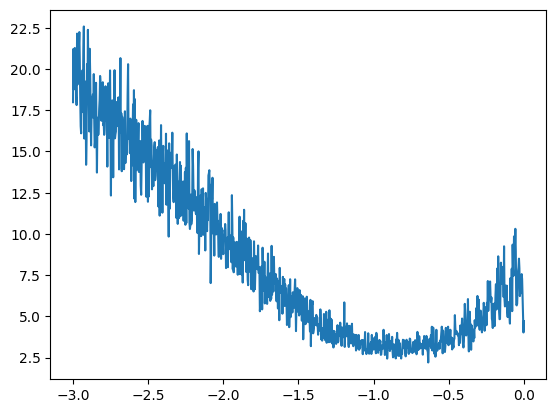

In [71]:
plt.plot(lri, lossi)

In [72]:
# train - test - dev split

In [73]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [74]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [75]:
#resetting everything again
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [76]:
sum(p.nelement() for p in parameters) 
#number of parameters in total

3481

In [77]:
for p in parameters:
    p.requires_grad = True

In [78]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre


In [79]:
lri =[]
lossi =[]
for i in range(1000):

    #minibacth construct
    ix = torch.randint(0,Xtr.shape[0],(32,))
    #forward pass
    emb= C[Xtr[ix]]
    h= torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2 
    loss=F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    #lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    lri.append(lre[i])
    lossi.append(loss.item())

print(loss.item())
# using the minibatchs the processig becomes really fast
#but it also makes quality of our gradient lower
#still its goo enough, still usefull, using this we might need more steps but it is faster


2.959591865539551


In [80]:
emb= C[Xdev]
h= torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 
loss=F.cross_entropy(logits, Ydev)
loss

tensor(3.6055, grad_fn=<NllLossBackward0>)

In [81]:
#larger hidden layer

In [82]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [83]:
sum(p.nelement() for p in parameters) 
#number of parameters in total

10281

In [84]:
for p in parameters:
    p.requires_grad = True

In [85]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [86]:
lri =[]
lossi =[]
stepi = []
for i in range(30000):

    #minibacth construct
    ix = torch.randint(0,Xtr.shape[0],(32,))
    #forward pass
    emb= C[Xtr[ix]]
    h= torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2 
    loss=F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    #lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.item())

print(loss.item())
# using the minibatchs the processig becomes really fast
#but it also makes quality of our gradient lower
#still its goo enough, still usefull, using this we might need more steps but it is faster


2.565969944000244


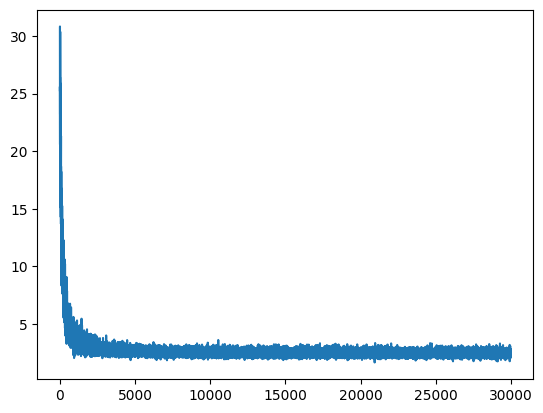

In [87]:
plt.plot(stepi, lossi)

In [88]:
emb= C[Xdev]
h= torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 
loss=F.cross_entropy(logits, Ydev)
loss

tensor(2.4425, grad_fn=<NllLossBackward0>)

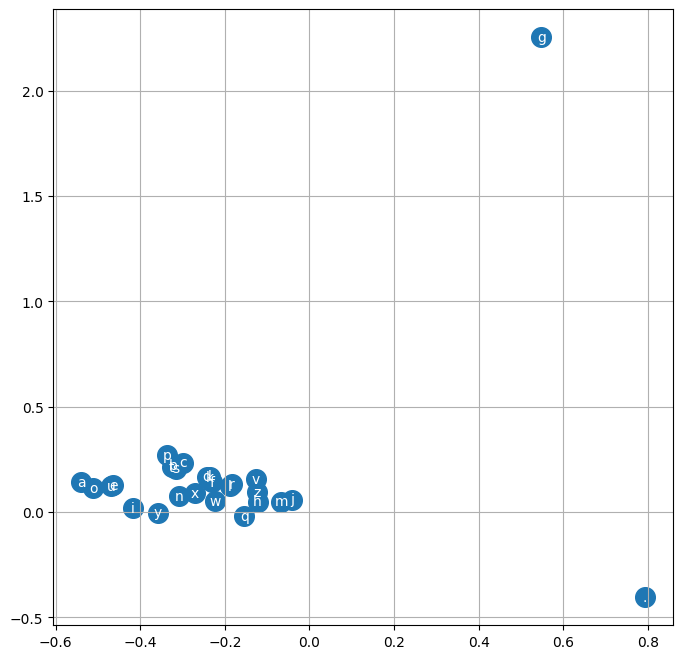

In [89]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [90]:
# larger embedding size

In [91]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g) # we have 10 dimensional embeddings instead of 2 now
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [92]:
sum(p.nelement() for p in parameters) 
#number of parameters in total

11897

In [93]:
for p in parameters:
    p.requires_grad = True

In [94]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [95]:
lri =[]
lossi =[]
stepi = []

In [124]:

for i in range(50000):

    #minibacth construct
    ix = torch.randint(0,Xtr.shape[0],(32,))
    #forward pass
    emb= C[Xtr[ix]]
    h= torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2 
    loss=F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    #lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())
# using the minibatchs the processig becomes really fast
#but it also makes quality of our gradient lower
#still its goo enough, still usefull, using this we might need more steps but it is faster


2.1567320823669434


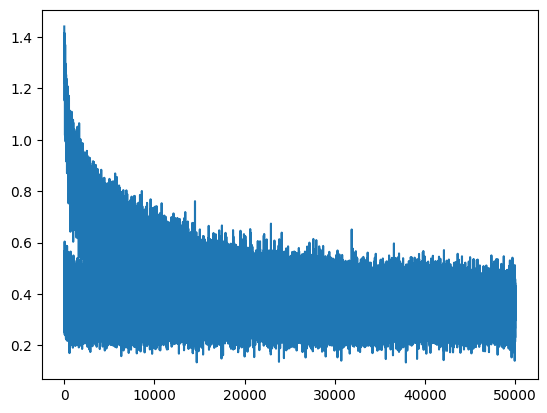

In [125]:
plt.plot(stepi, lossi)

In [126]:
emb= C[Xdev]
h= torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2 
loss=F.cross_entropy(logits, Ydev)
loss

tensor(2.1805, grad_fn=<NllLossBackward0>)

In [127]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mora.
amyah.
see.
madhonaley.
threthagrami.
azeredieliigh.
parelle.
elieananaraelyn.
malaia.
noshir.
rishiriel.
kindreelle.
jathustous.
kavder.
yah.
fael.
yuma.
masteyah.
hal.
aalynn.


# for calculating average similarity between generated and original names

In [121]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)
generated_names = []
for _ in range(100):
    
    out = []
    context = [0] * block_size  # initialize with all ...
    while True:
      emb = C[torch.tensor([context])]  # (1, block_size, d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    # Fix here: Convert integer indices in 'out' to corresponding characters using 'itos'
    generated_name = ''.join(itos[i] for i in out).strip('.')  # Map indices to chars, remove trailing '.'
    generated_names.append(generated_name)

# Print some generated names to verify
print(generated_names[:10])


['mona', 'mayanniee', 'medhayla', 'revers', 'bjd', 'leg', 'adelyn', 'elin', 'shy', 'jen']


In [122]:
# Load generated names into a DataFrame
import pandas as pd
df_generated = pd.DataFrame(generated_names, columns=['Generated_Name'])

In [123]:
# Define a function to find the maximum similarity score for a generated name
def find_max_similarity(generated_name, name_list):
    min_distance = float('inf')
    
    for name in name_list:
        distance = Levenshtein.distance(generated_name, name)
        if distance < min_distance:
            min_distance = distance
            
    similarity_score = 1 - min_distance / max(len(generated_name), len(name_list[0]))
    return similarity_score

# Calculate similarity for each generated name
similarity_scores = []
for gen_name in generated_names:
    similarity = find_max_similarity(gen_name, original_names)
    similarity_scores.append(similarity)

# Add similarity scores to the DataFrame
df_generated['Similarity_Score'] = similarity_scores

# Calculate the average similarity score
average_similarity_score = sum(similarity_scores) / len(similarity_scores)

# Print the DataFrame and the average similarity score
print(df_generated.head())
print(f"\nAverage Similarity Score for 100 generated names: {average_similarity_score:.4f}")

  Generated_Name  Similarity_Score
0           mona          1.000000
1      mayanniee          0.666667
2       medhayla          0.750000
3         revers          0.833333
4            bjd          0.750000

Average Similarity Score for 100 generated names: 0.7996
